# Examples for packages/scikit-learn/index.md

(simple-picture-of-the-formal-problem-of-machine-learning)=

## Simple picture of the formal problem of machine learning

<!--- plot_separator -->

This example generates simple synthetic data points and shows a
separating hyperplane on them.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_blobs

In [2]:
# we create 50 separable synthetic points
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

In [3]:
# fit the model
clf = SGDClassifier(loss="hinge", alpha=0.01, fit_intercept=True)
clf.fit(X, Y)

SGDClassifier(alpha=0.01)

In [4]:
# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

In [5]:
X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]

(np.float64(-1.0),
 np.float64(5.0),
 np.float64(-1.0),
 np.float64(5.797965192816837))

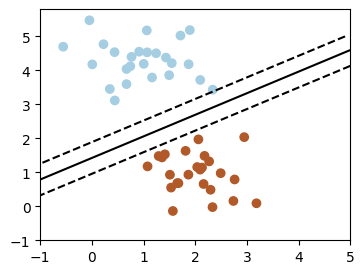

In [6]:
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.contour(
    X1, X2, Z, [-1.0, 0.0, 1.0], colors="k", linestyles=["dashed", "solid", "dashed"]
)
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap="Paired")
ax.axis("tight")

(linear-regression)=

## linear_regression

<!--- plot_linear_regression -->

**A simple linear regression**

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
# x from 0 to 30
rng = np.random.default_rng()
x = 30 * rng.random((20, 1))

In [9]:
# y = a*x + b with noise
y = 0.5 * x + 1.0 + rng.normal(size=x.shape)

In [10]:
# create a linear regression model
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [11]:
# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])

(np.float64(-1.5),
 np.float64(31.5),
 np.float64(0.9542578297206898),
 np.float64(17.198366341124462))

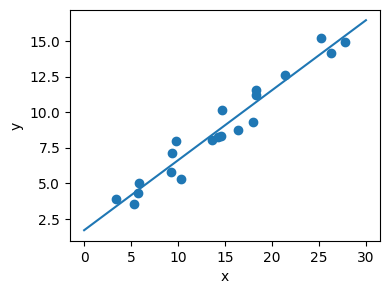

In [12]:
# plot the results
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.axis("tight")

(plot-2d-views-of-the-iris-dataset)=

## Plot 2D views of the iris dataset

<!--- plot_iris_scatter -->

Plot a simple scatter plot of 2 features of the iris dataset.

Note that more elaborate visualization of this dataset is detailed
in the {ref}`statistics` chapter.

In [13]:
# Load the data
from sklearn.datasets import load_iris

In [14]:
iris = load_iris()

In [15]:
from matplotlib import ticker

In [16]:
# The indices of the features that we are plotting
x_index = 0
y_index = 1

In [17]:
# this formatter will label the colorbar with the correct target names
formatter = ticker.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

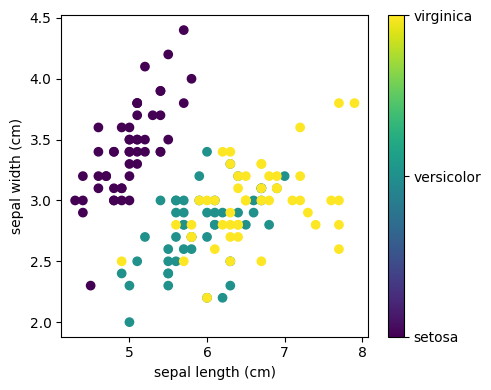

In [18]:
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()

(nearest-neighbor-prediction-on-iris)=

## Nearest-neighbor prediction on iris

<!--- plot_iris_knn -->

Plot the decision boundary of nearest neighbor decision on iris, first
with a single nearest neighbor, and then using 3 nearest neighbors.

In [19]:
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

In [20]:
# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

In [21]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [22]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [23]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

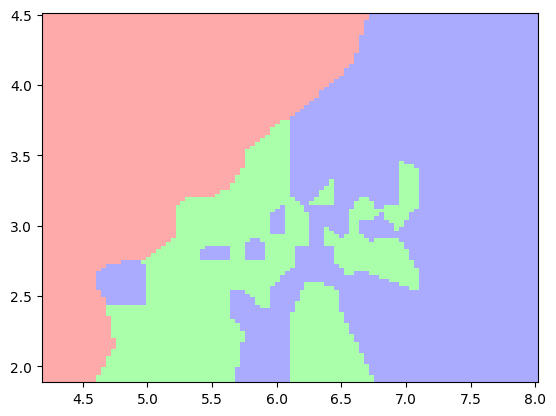

In [24]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

(np.float64(4.12),
 np.float64(8.08),
 np.float64(1.88),
 np.float64(4.5200000000000005))

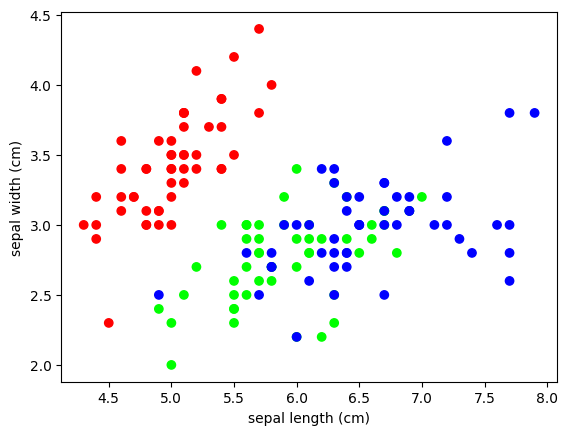

In [25]:
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.axis("tight")

In [26]:
# And now, redo the analysis with 3 neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [27]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

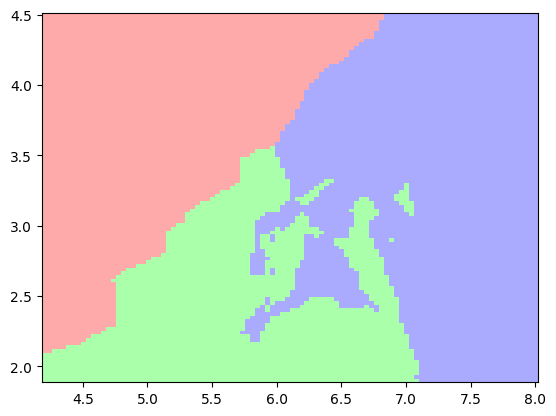

In [28]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

(np.float64(4.12),
 np.float64(8.08),
 np.float64(1.88),
 np.float64(4.5200000000000005))

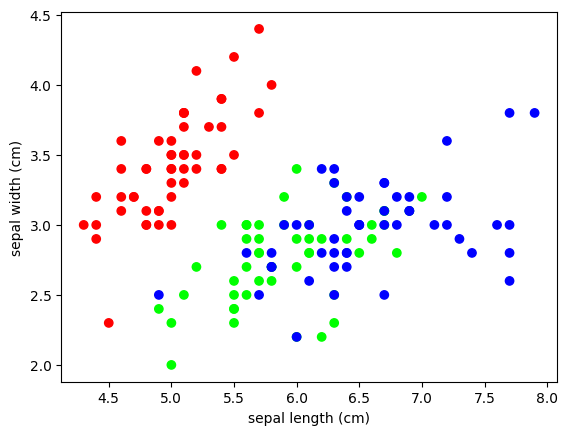

In [29]:
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.axis("tight")

(plot-fitting-a-9th-order-polynomial)=

## Plot fitting a 9th order polynomial

<!--- plot_polynomial_regression -->

Fits data generated from a 9th order polynomial with model of 4th order
and 9th order polynomials, to demonstrate that often simpler models are
to be preferred

In [30]:
from matplotlib.colors import ListedColormap

In [31]:
from sklearn import linear_model

In [32]:
# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

In [33]:
rng = np.random.default_rng(27446968)
x = 2 * rng.random(100) - 1

In [34]:
f = lambda t: 1.2 * t**2 + 0.1 * t**3 - 0.4 * t**5 - 0.5 * t**9
y = f(x) + 0.4 * rng.normal(size=100)

In [35]:
x_test = np.linspace(-1, 1, 100)

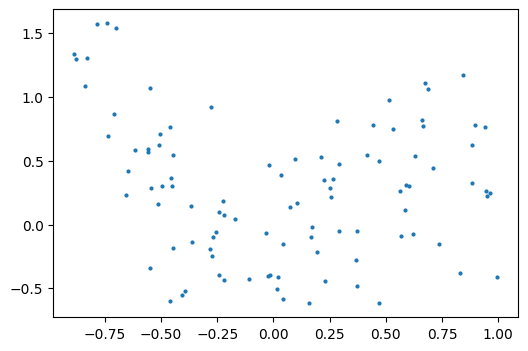

In [36]:
# The data
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)

Text(0.5, 1.0, 'Fitting a 4th and a 9th order polynomial')

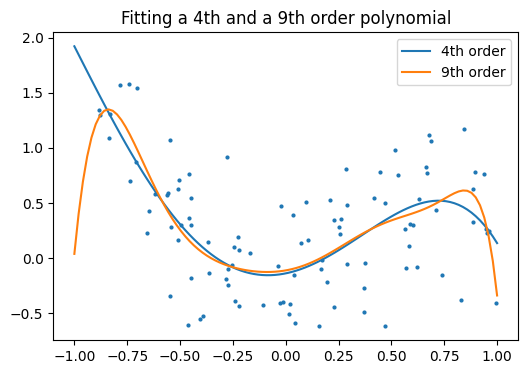

In [37]:
# Fitting 4th and 9th order polynomials
#
# For this we need to engineer features: the n_th powers of x:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)

X = np.array([x**i for i in range(5)]).T
X_test = np.array([x_test**i for i in range(5)]).T
regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.plot(x_test, regr.predict(X_test), label="4th order")

X = np.array([x**i for i in range(10)]).T
X_test = np.array([x_test**i for i in range(10)]).T
regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.plot(x_test, regr.predict(X_test), label="9th order")

plt.legend(loc="best")
plt.axis("tight")
plt.title("Fitting a 4th and a 9th order polynomial")

Text(0.5, 1.0, 'Ground truth (9th order polynomial)')

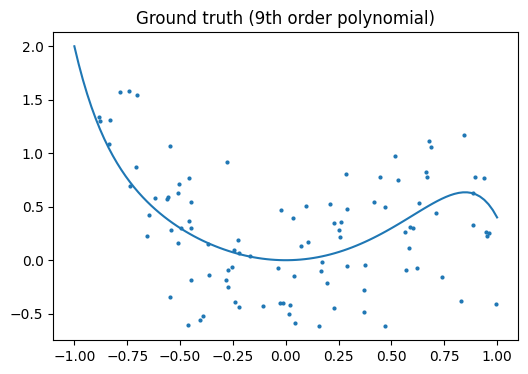

In [38]:
# Ground truth
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)
plt.plot(x_test, f(x_test), label="truth")
plt.axis("tight")
plt.title("Ground truth (9th order polynomial)")

(simple-visualization-and-classification-of-the-digits-dataset)=

## Simple visualization and classification of the digits dataset

<!--- plot_digits_simple_classif -->

Plot the first few samples of the digits dataset and a 2D representation
built using PCA, then do a simple classification

In [39]:
from sklearn.datasets import load_digits

In [40]:
digits = load_digits()

In [41]:
# Plot the data: images of digits
# -------------------------------
#
# Each data in a 8x8 image

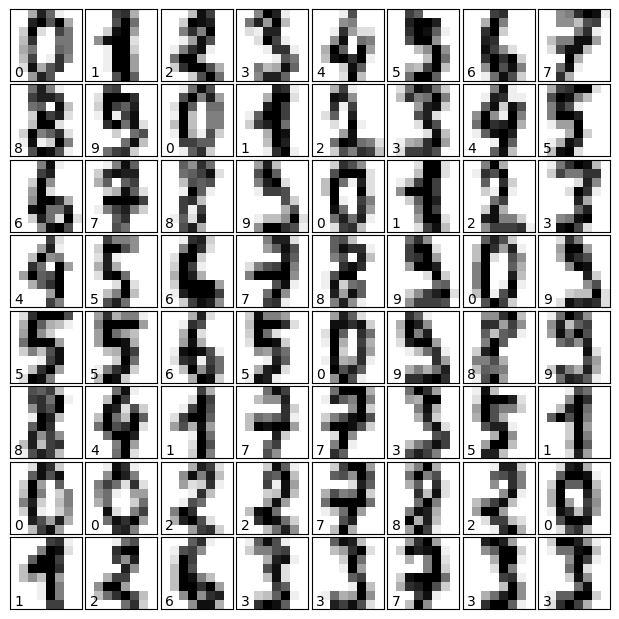

In [42]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap="binary", interpolation="nearest")
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

Plot a projection on the 2 first principal axis

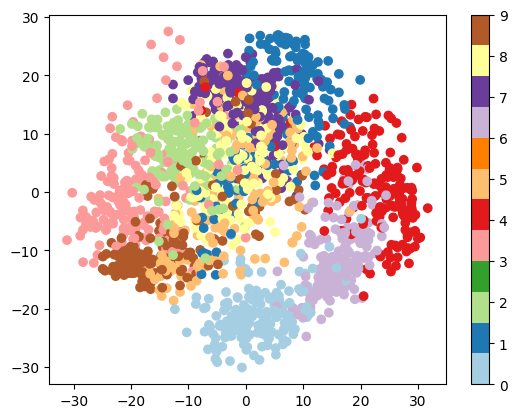

In [43]:
from sklearn.decomposition import PCA

plt.figure()
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

Classify with Gaussian naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [45]:
# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [46]:
# train the model
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [47]:
# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

In [48]:
# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

<Figure size 600x600 with 0 Axes>

In [49]:
# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap="binary", interpolation="nearest")

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color="green")
    else:
        ax.text(0, 7, str(predicted[i]), color="red")

In [50]:
# Quantify the performance
# ------------------------
#
# First print the number of correct matches
matches = predicted == expected
print(matches.sum())

# The total number of data points
print(len(matches))

#  And now, the ratio of correct predictions
matches.sum() / float(len(matches))

395
450


np.float64(0.8777777777777778)

In [51]:
# Print the classification report
from sklearn import metrics

In [52]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.75      0.91      0.82        45
           2       0.97      0.75      0.85        44
           3       0.97      0.86      0.91        42
           4       0.94      0.87      0.91        39
           5       0.93      0.90      0.91        48
           6       0.98      0.98      0.98        55
           7       0.77      1.00      0.87        43
           8       0.66      0.84      0.74        44
           9       0.97      0.67      0.79        45

    accuracy                           0.88       450
   macro avg       0.89      0.88      0.88       450
weighted avg       0.90      0.88      0.88       450



In [53]:
# Print the confusion matrix
print(metrics.confusion_matrix(expected, predicted))

[[44  0  0  0  1  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  1  2  1]
 [ 0  3 33  0  1  0  0  0  7  0]
 [ 0  0  0 36  0  1  0  3  2  0]
 [ 0  3  0  0 34  0  0  2  0  0]
 [ 0  0  0  0  0 43  0  3  2  0]
 [ 0  0  1  0  0  0 54  0  0  0]
 [ 0  0  0  0  0  0  0 43  0  0]
 [ 0  6  0  0  0  1  0  0 37  0]
 [ 0  2  0  1  0  1  1  4  6 30]]


(a-simple-regression-analysis-on-the-california-housing-data)=

## A simple regression analysis on the California housing data

<!--- plot_california_prediction -->

Here we perform a simple regression analysis on the California housing
data, exploring two types of regressors.

In [54]:
from sklearn.datasets import fetch_california_housing

In [55]:
data = fetch_california_housing(as_frame=True)

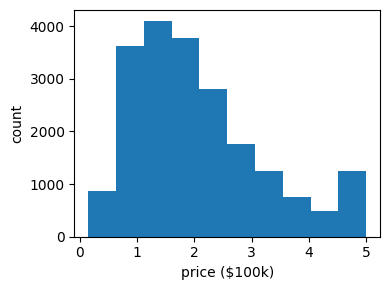

In [56]:
# Print a histogram of the quantity to predict: price
plt.figure(figsize=(4, 3))
plt.hist(data.target)
plt.xlabel("price ($100k)")
plt.ylabel("count")
plt.tight_layout()

Print the joint histogram for each feature

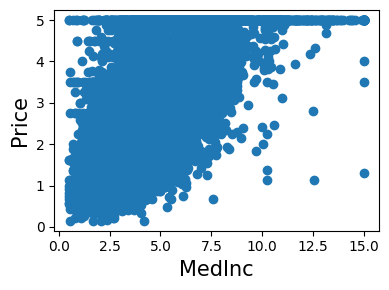

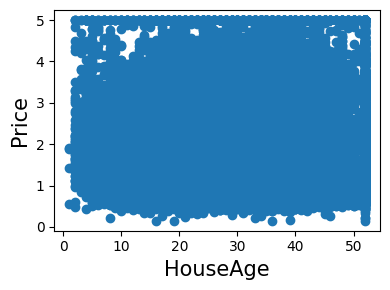

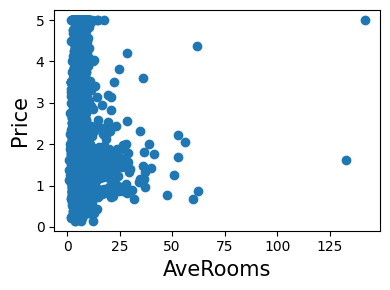

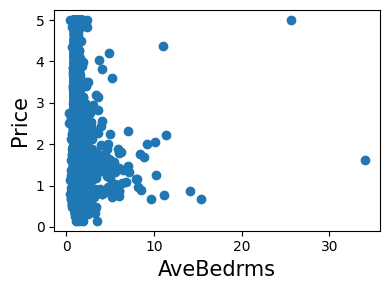

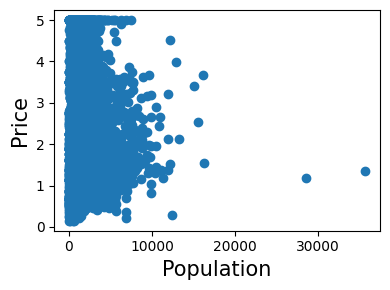

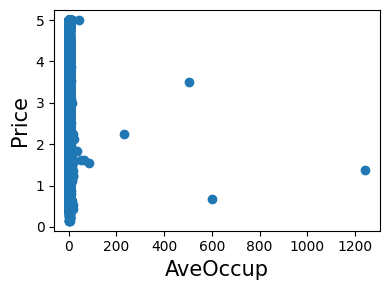

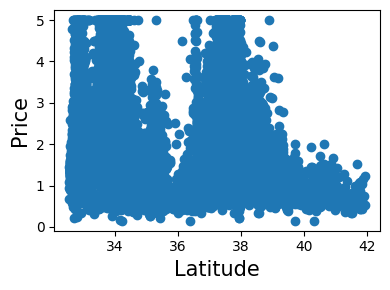

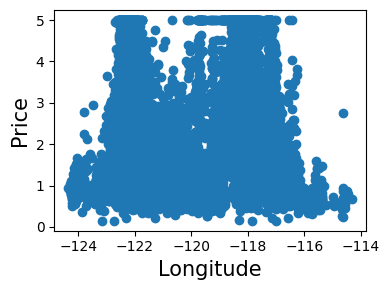

In [57]:
for index, feature_name in enumerate(data.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(data.data[feature_name], data.target)
    plt.ylabel("Price", size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

### Simple prediction

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test

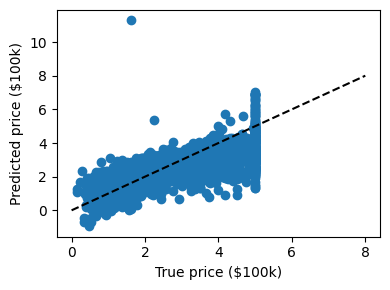

In [62]:
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 8], [0, 8], "--k")
plt.axis("tight")
plt.xlabel("True price ($100k)")
plt.ylabel("Predicted price ($100k)")
plt.tight_layout()

Prediction with gradient boosted tree

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

In [64]:
clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

GradientBoostingRegressor()

In [65]:
predicted = clf.predict(X_test)
expected = y_test

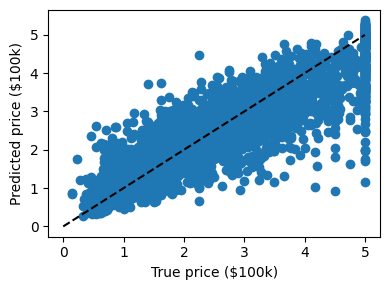

In [66]:
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 5], [0, 5], "--k")
plt.axis("tight")
plt.xlabel("True price ($100k)")
plt.ylabel("Predicted price ($100k)")
plt.tight_layout()

In [67]:
# Print the error rate
print(f"RMS: {np.sqrt(np.mean((predicted - expected) ** 2))!r} ")

RMS: np.float64(0.5319266101044602) 


(measuring-decision-tree-performance)=

## Measuring Decision Tree performance

<!--- plot_measuring_performance -->

Demonstrates overfit when testing on train set.

Get the data

In [68]:
from sklearn.datasets import fetch_california_housing

In [69]:
data = fetch_california_housing(as_frame=True)

In [70]:
# Train and test a model
from sklearn.tree import DecisionTreeRegressor

In [71]:
clf = DecisionTreeRegressor().fit(data.data, data.target)

In [72]:
predicted = clf.predict(data.data)
expected = data.target

Plot predicted as a function of expected

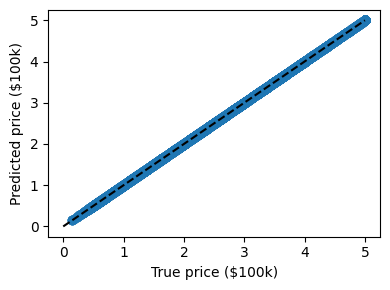

In [73]:
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 5], [0, 5], "--k")
plt.axis("tight")
plt.xlabel("True price ($100k)")
plt.ylabel("Predicted price ($100k)")
plt.tight_layout()

Pretty much no errors!

This is too good to be true: we are testing the model on the train
data, which is not a measure of generalization.

**The results are not valid**

(linear-model-cv)=

## linear_model_cv

<!--- plot_linear_model_cv -->

Use the RidgeCV and LassoCV to set the regularization parameter

In [74]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

In [75]:
data = load_diabetes()
X, y = data.data, data.target
print(X.shape)

(442, 10)


In [76]:
# Compute the cross-validation score with the default hyper-parameters
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso

In [77]:
for Model in [Ridge, Lasso]:
    model = Model()
    print(f"{Model.__name__}: {cross_val_score(model, X, y).mean()}")

Ridge: 0.410174971340889
Lasso: 0.3375593674654274


In [78]:
# We compute the cross-validation score as a function of alpha, the
# strength of the regularization for Lasso and Ridge

In [79]:
alphas = np.logspace(-3, -1, 30)

In [80]:
plt.figure(figsize=(5, 3))

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

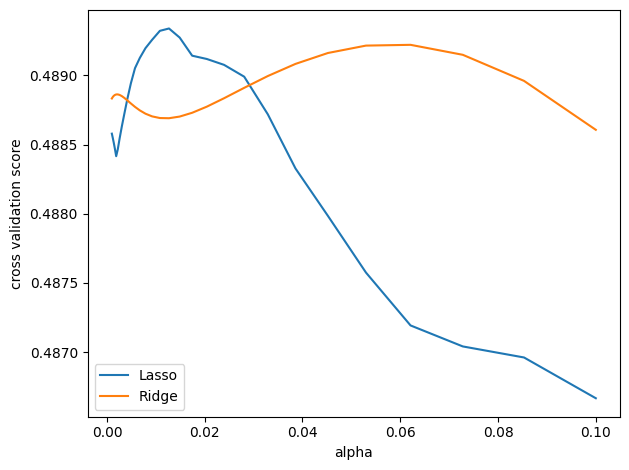

In [81]:
for Model in [Lasso, Ridge]:
    scores = [cross_val_score(Model(alpha), X, y, cv=3).mean() for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)
plt.legend(loc="lower left")
plt.xlabel("alpha")
plt.ylabel("cross validation score")
plt.tight_layout()

(pca)=

## pca

<!--- plot_pca -->

Demo PCA in 2D

In [82]:
# Load the iris data
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [83]:
# Fit a PCA
from sklearn.decomposition import PCA

In [84]:
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

PCA(n_components=2, whiten=True)

In [85]:
# Project the data in 2D
X_pca = pca.transform(X)

In [86]:
# Visualize the data
target_ids = range(len(iris.target_names))

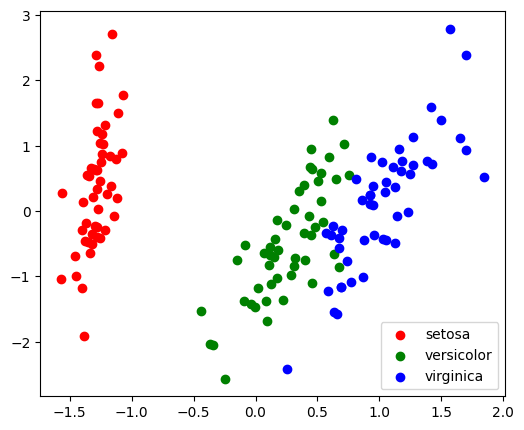

In [87]:
plt.figure(figsize=(6, 5))
for i, c, label in zip(target_ids, "rgbcmykw", iris.target_names, strict=False):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=c, label=label)
plt.legend()

(tsne)=

## tSNE to visualize digits

<!--- plot_tsne -->

Here we use {class}`sklearn.manifold.TSNE` to visualize the digits
datasets. Indeed, the digits are vectors in a 8\*8 = 64 dimensional space.
We want to project them in 2D for visualization. tSNE is often a good
solution, as it groups and separates data points based on their local
relationship.

In [88]:
# Load the iris data
from sklearn import datasets

In [89]:
digits = datasets.load_digits()
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]

In [90]:
# Fit and transform with a TSNE
from sklearn.manifold import TSNE

In [91]:
tsne = TSNE(n_components=2, random_state=0)

In [92]:
# Project the data in 2D
X_2d = tsne.fit_transform(X)

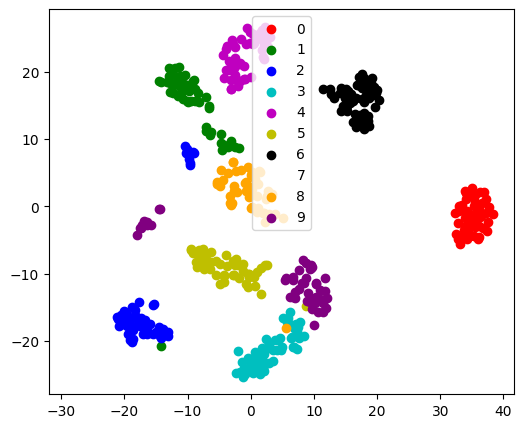

In [93]:
# Visualize the data
target_ids = range(len(digits.target_names))
plt.figure(figsize=(6, 5))
colors = "r", "g", "b", "c", "m", "y", "k", "w", "orange", "purple"
for i, c, label in zip(target_ids, colors, digits.target_names, strict=True):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()

(bias-variance)=

## Bias and variance of polynomial fit

<!--- plot_bias_variance -->

Demo overfitting, underfitting, and validation and learning curves with
polynomial regression.

Fit polynomes of different degrees to a dataset: for too small a degree,
the model _underfits_, while for too large a degree, it overfits.

In [94]:
def generating_func(x, rng=None, error=0.5):
    rng = np.random.default_rng(rng)
    return rng.normal(10 - 1.0 / (x + 0.1), error)

In [95]:
# A polynomial regression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

A simple figure to illustrate the problem

In [96]:
n_samples = 8

In [97]:
rng = np.random.default_rng(27446968)
x = 10 ** np.linspace(-2, 0, n_samples)
y = generating_func(x, rng=rng)

In [98]:
x_test = np.linspace(-0.2, 1.2, 1000)

In [99]:
titles = ["d = 1 (under-fit; high bias)", "d = 2", "d = 6 (over-fit; high variance)"]
degrees = [1, 2, 6]

In [100]:
fig = plt.figure(figsize=(9, 3.5))
fig.subplots_adjust(left=0.06, right=0.98, bottom=0.15, top=0.85, wspace=0.05)

<Figure size 900x350 with 0 Axes>

In [101]:
for i, d in enumerate(degrees):
    ax = fig.add_subplot(131 + i, xticks=[], yticks=[])
    ax.scatter(x, y, marker="x", c="k", s=50)

    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(x[:, np.newaxis], y)
    ax.plot(x_test, model.predict(x_test[:, np.newaxis]), "-b")

    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(0, 12)
    ax.set_xlabel("house size")
    if i == 0:
        ax.set_ylabel("price")

    ax.set_title(titles[i])

In [102]:
# Generate a larger dataset
from sklearn.model_selection import train_test_split

In [103]:
n_samples = 200
test_size = 0.4
error = 1.0

In [104]:
# randomly sample the data
x = rng.random(n_samples)
y = generating_func(x, rng=rng, error=error)

In [105]:
# split into training, validation, and testing sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

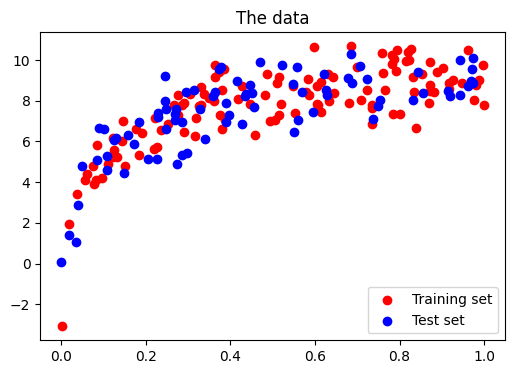

In [106]:
# show the training and validation sets
plt.figure(figsize=(6, 4))
plt.scatter(x_train, y_train, color="red", label="Training set")
plt.scatter(x_test, y_test, color="blue", label="Test set")
plt.title("The data")
plt.legend(loc="best")

In [107]:
# Plot a validation curve
from sklearn.model_selection import validation_curve

In [108]:
degrees = list(range(1, 21))

In [109]:
model = make_pipeline(PolynomialFeatures(), LinearRegression())

In [110]:
# The parameter to vary is the "degrees" on the pipeline step
# "polynomialfeatures"
train_scores, validation_scores = validation_curve(
    model,
    x[:, np.newaxis],
    y,
    param_name="polynomialfeatures__degree",
    param_range=degrees,
)

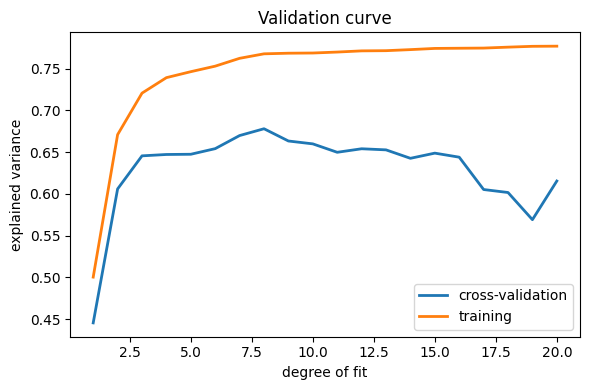

In [111]:
# Plot the mean train error and validation error across folds
plt.figure(figsize=(6, 4))
plt.plot(degrees, validation_scores.mean(axis=1), lw=2, label="cross-validation")
plt.plot(degrees, train_scores.mean(axis=1), lw=2, label="training")
plt.legend(loc="best")
plt.xlabel("degree of fit")
plt.ylabel("explained variance")
plt.title("Validation curve")
plt.tight_layout()

## Learning curves

Plot train and test error with an increasing number of samples

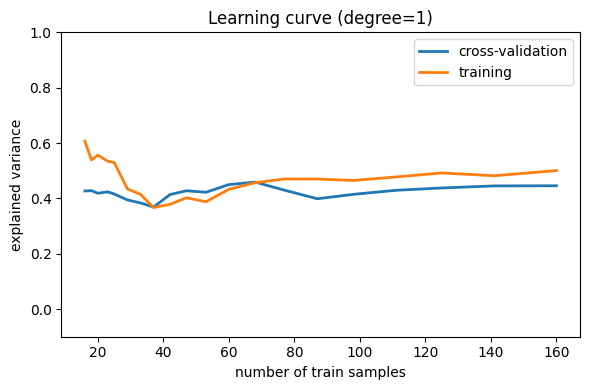

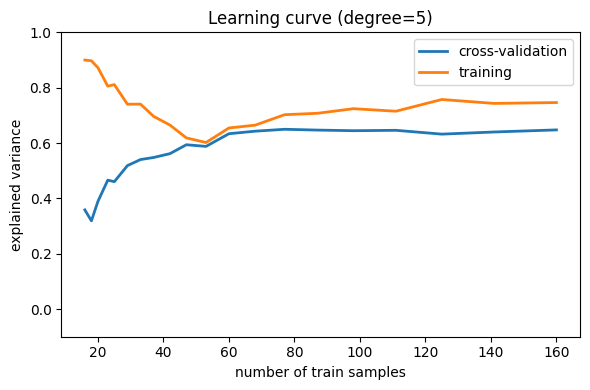

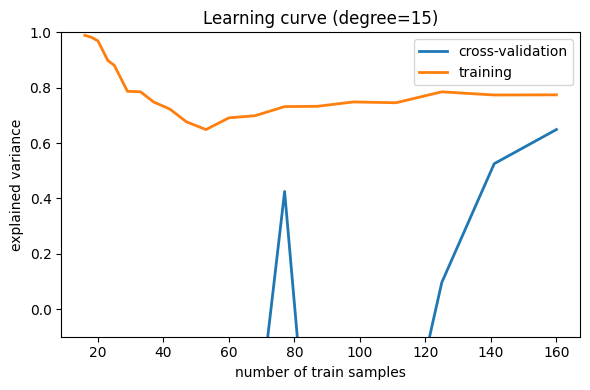

In [112]:
# A learning curve for d=1, 5, 15
for d in [1, 5, 15]:
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())

    from sklearn.model_selection import learning_curve

    train_sizes, train_scores, validation_scores = learning_curve(
        model, x[:, np.newaxis], y, train_sizes=np.logspace(-1, 0, 20)
    )

    # Plot the mean train error and validation error across folds
    plt.figure(figsize=(6, 4))
    plt.plot(
        train_sizes, validation_scores.mean(axis=1), lw=2, label="cross-validation"
    )
    plt.plot(train_sizes, train_scores.mean(axis=1), lw=2, label="training")
    plt.ylim(ymin=-0.1, ymax=1)

    plt.legend(loc="best")
    plt.xlabel("number of train samples")
    plt.ylabel("explained variance")
    plt.title(f"Learning curve (degree={d})")
    plt.tight_layout()

## Other examples

(tutorial-diagrams)=

### Tutorial Diagrams

<!--- plot_ML_flow_chart -->

This script plots the flow-charts used in the scikit-learn tutorials.

In [113]:
from matplotlib.patches import Circle, Rectangle, Polygon, Arrow, FancyArrow

In [114]:
def create_base(box_bg="#CCCCCC", arrow1="#88CCFF", arrow2="#88FF88", supervised=True):
    fig = plt.figure(figsize=(9, 6), facecolor="w")
    ax = plt.axes((0, 0, 1, 1), xticks=[], yticks=[], frameon=False)
    ax.set_xlim(0, 9)
    ax.set_ylim(0, 6)

    patches = [
        Rectangle((0.3, 3.6), 1.5, 1.8, zorder=1, fc=box_bg),
        Rectangle((0.5, 3.8), 1.5, 1.8, zorder=2, fc=box_bg),
        Rectangle((0.7, 4.0), 1.5, 1.8, zorder=3, fc=box_bg),
        Rectangle((2.9, 3.6), 0.2, 1.8, fc=box_bg),
        Rectangle((3.1, 3.8), 0.2, 1.8, fc=box_bg),
        Rectangle((3.3, 4.0), 0.2, 1.8, fc=box_bg),
        Rectangle((0.3, 0.2), 1.5, 1.8, fc=box_bg),
        Rectangle((2.9, 0.2), 0.2, 1.8, fc=box_bg),
        Circle((5.5, 3.5), 1.0, fc=box_bg),
        Polygon([[5.5, 1.7], [6.1, 1.1], [5.5, 0.5], [4.9, 1.1]], fc=box_bg),
        FancyArrow(
            2.3, 4.6, 0.35, 0, fc=arrow1, width=0.25, head_width=0.5, head_length=0.2
        ),
        FancyArrow(
            3.75, 4.2, 0.5, -0.2, fc=arrow1, width=0.25, head_width=0.5, head_length=0.2
        ),
        FancyArrow(
            5.5, 2.4, 0, -0.4, fc=arrow1, width=0.25, head_width=0.5, head_length=0.2
        ),
        FancyArrow(
            2.0, 1.1, 0.5, 0, fc=arrow2, width=0.25, head_width=0.5, head_length=0.2
        ),
        FancyArrow(
            3.3, 1.1, 1.3, 0, fc=arrow2, width=0.25, head_width=0.5, head_length=0.2
        ),
        FancyArrow(
            6.2, 1.1, 0.8, 0, fc=arrow2, width=0.25, head_width=0.5, head_length=0.2
        ),
    ]

    if supervised:
        patches += [
            Rectangle((0.3, 2.4), 1.5, 0.5, zorder=1, fc=box_bg),
            Rectangle((0.5, 2.6), 1.5, 0.5, zorder=2, fc=box_bg),
            Rectangle((0.7, 2.8), 1.5, 0.5, zorder=3, fc=box_bg),
            FancyArrow(
                2.3, 2.9, 2.0, 0, fc=arrow1, width=0.25, head_width=0.5, head_length=0.2
            ),
            Rectangle((7.3, 0.85), 1.5, 0.5, fc=box_bg),
        ]
    else:
        patches += [Rectangle((7.3, 0.2), 1.5, 1.8, fc=box_bg)]

    for p in patches:
        ax.add_patch(p)

    plt.text(
        1.45,
        4.9,
        "Training\nText,\nDocuments,\nImages,\netc.",
        ha="center",
        va="center",
        fontsize=14,
    )

    plt.text(3.6, 4.9, "Feature\nVectors", ha="left", va="center", fontsize=14)

    plt.text(
        5.5, 3.5, "Machine\nLearning\nAlgorithm", ha="center", va="center", fontsize=14
    )

    plt.text(
        1.05,
        1.1,
        "New Text,\nDocument,\nImage,\netc.",
        ha="center",
        va="center",
        fontsize=14,
    )

    plt.text(3.3, 1.7, "Feature\nVector", ha="left", va="center", fontsize=14)

    plt.text(5.5, 1.1, "Predictive\nModel", ha="center", va="center", fontsize=12)

    if supervised:
        plt.text(1.45, 3.05, "Labels", ha="center", va="center", fontsize=14)

        plt.text(8.05, 1.1, "Expected\nLabel", ha="center", va="center", fontsize=14)
        plt.text(
            8.8, 5.8, "Supervised Learning Model", ha="right", va="top", fontsize=18
        )

    else:
        plt.text(
            8.05,
            1.1,
            "Likelihood\nor Cluster ID\nor Better\nRepresentation",
            ha="center",
            va="center",
            fontsize=12,
        )
        plt.text(
            8.8, 5.8, "Unsupervised Learning Model", ha="right", va="top", fontsize=18
        )

In [115]:
def plot_supervised_chart(annotate=False):
    create_base(supervised=True)
    if annotate:
        fontdict = {"color": "r", "weight": "bold", "size": 14}
        plt.text(
            1.9,
            4.55,
            "X = vec.fit_transform(input)",
            fontdict=fontdict,
            rotation=20,
            ha="left",
            va="bottom",
        )
        plt.text(
            3.7,
            3.2,
            "clf.fit(X, y)",
            fontdict=fontdict,
            rotation=20,
            ha="left",
            va="bottom",
        )
        plt.text(
            1.7,
            1.5,
            "X_new = vec.transform(input)",
            fontdict=fontdict,
            rotation=20,
            ha="left",
            va="bottom",
        )
        plt.text(
            6.1,
            1.5,
            "y_new = clf.predict(X_new)",
            fontdict=fontdict,
            rotation=20,
            ha="left",
            va="bottom",
        )

In [116]:
def plot_unsupervised_chart():
    create_base(supervised=False)

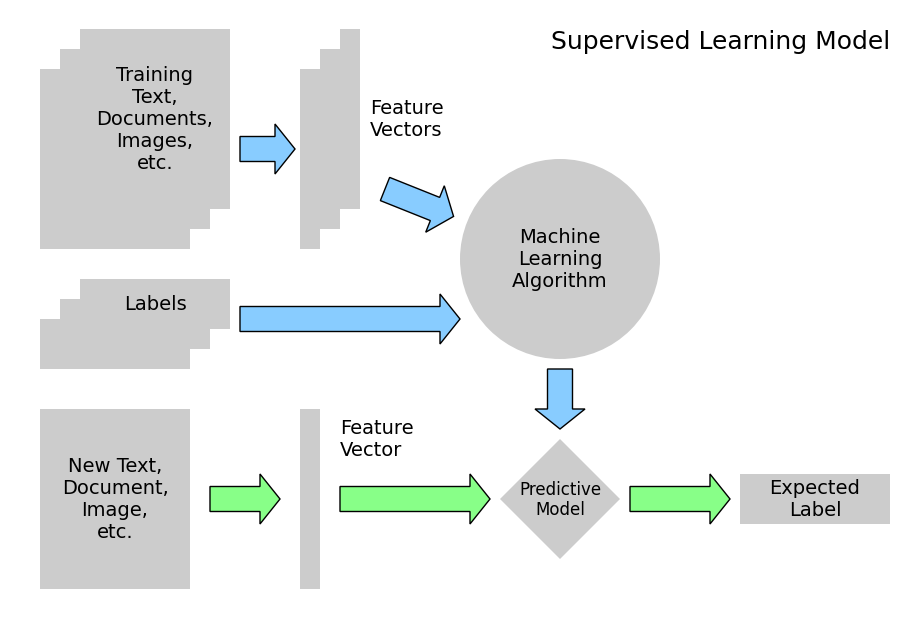

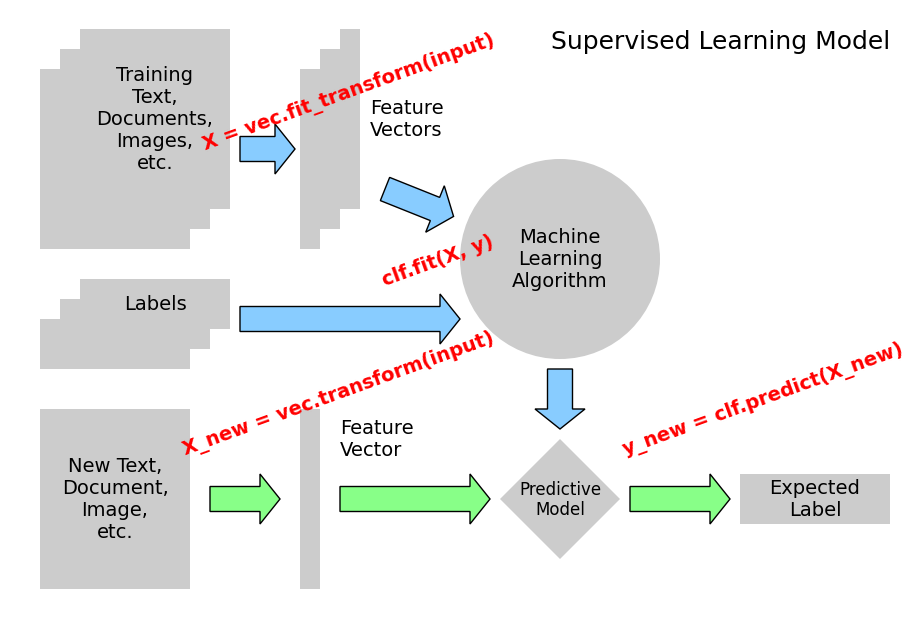

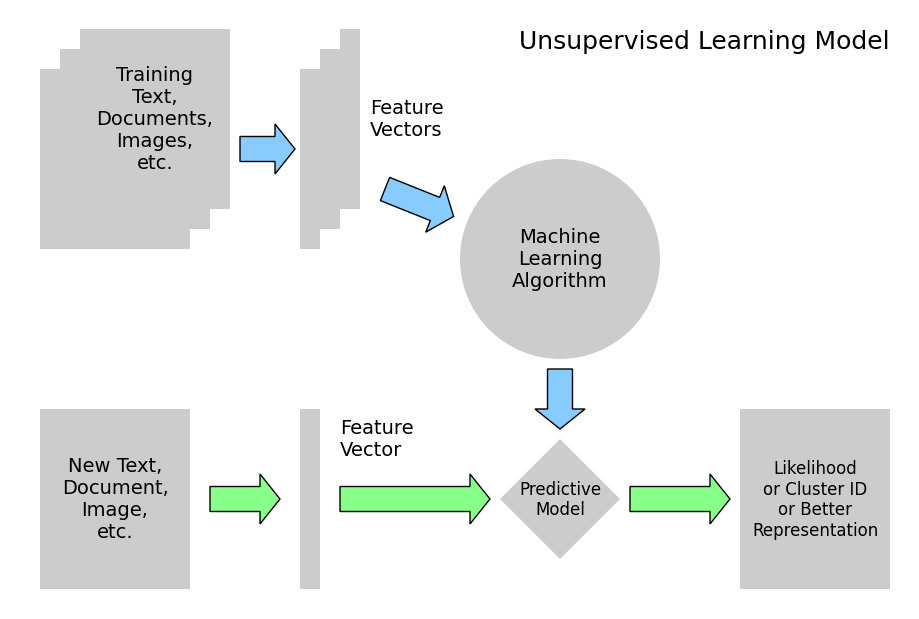

In [117]:
if __name__ == "__main__":
    plot_supervised_chart(False)
    plot_supervised_chart(True)
    plot_unsupervised_chart()

(compare-classifiers-on-the-digits-data)=

### Compare classifiers on the digits data

<!--- plot_compare_classifiers -->

Compare the performance of a variety of classifiers on a test set for the
digits data.

In [118]:
from sklearn import model_selection, datasets, metrics
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [119]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, random_state=0
)

In [120]:
for Model in [LinearSVC, GaussianNB, KNeighborsClassifier]:
    clf = Model().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{Model.__name__}: {metrics.f1_score(y_test, y_pred, average='macro')}")

LinearSVC: 0.9365582188220227
GaussianNB: 0.8332741681010102
KNeighborsClassifier: 0.9804562804949924


In [121]:
print("------------------")

------------------


In [122]:
# test SVC loss
for loss in ["hinge", "squared_hinge"]:
    clf = LinearSVC(loss=loss).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(
        f"LinearSVC(loss='{loss}'): {metrics.f1_score(y_test, y_pred, average='macro')}"
    )

LinearSVC(loss='hinge'): 0.9306351983893728
LinearSVC(loss='squared_hinge'): 0.9365582188220227


/Users/mb312/.virtualenvs/sp-lectures/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [123]:
print("-------------------")

-------------------


In [124]:
# test the number of neighbors
for n_neighbors in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(
        f"KNeighbors(n_neighbors={n_neighbors}): {metrics.f1_score(y_test, y_pred, average='macro')}"
    )

KNeighbors(n_neighbors=1): 0.9913675218842191
KNeighbors(n_neighbors=2): 0.9848442068835102
KNeighbors(n_neighbors=3): 0.9867753449543099
KNeighbors(n_neighbors=4): 0.9803719053818863
KNeighbors(n_neighbors=5): 0.9804562804949924


KNeighbors(n_neighbors=6): 0.9757924194139573
KNeighbors(n_neighbors=7): 0.9780645792142071
KNeighbors(n_neighbors=8): 0.9780645792142071


KNeighbors(n_neighbors=9): 0.9780645792142071
KNeighbors(n_neighbors=10): 0.9755550897728812


(the-eigenfaces-example-chaining-pca-and-svms)=

### The eigenfaces example: chaining PCA and SVMs

<!--- plot_eigenfaces -->

The goal of this example is to show how an unsupervised method and a
supervised one can be chained for better prediction. It starts with a
didactic but lengthy way of doing things, and finishes with the
idiomatic approach to pipelining in scikit-learn.

Here we'll take a look at a simple facial recognition example. Ideally,
we would use a dataset consisting of a subset of the [Labeled Faces in
the Wild](http://vis-www.cs.umass.edu/lfw) data that is available with
{func}`sklearn.datasets.fetch_lfw_people`. However, this is a relatively large
download (~200MB) so we will do the tutorial on a simpler, less rich dataset.
Feel free to explore the LFW dataset.

In [125]:
from sklearn import datasets

In [126]:
faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

Let's visualize these faces to see what we're working with

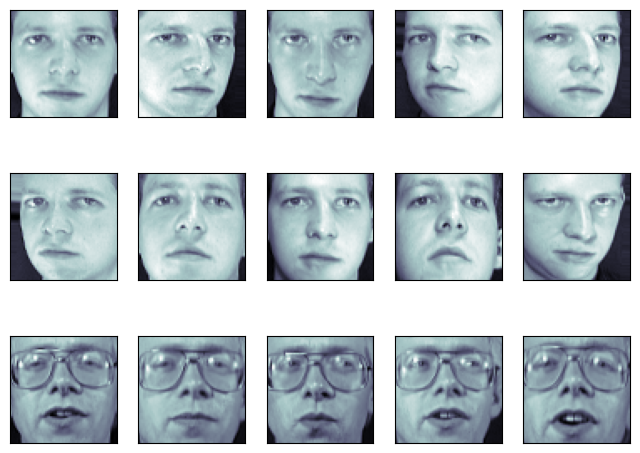

In [127]:
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap="bone")

::: {note}

Note that these faces have already been localized and scaled to a common size.
This is an important preprocessing piece for facial recognition, and is
a process that can require a large collection of training data. This can be
done in scikit-learn, but the challenge is gathering a sufficient amount of
training data for the algorithm to work. Fortunately, this piece is common
enough that it has been done. One good resource is [OpenCV](https://docs.opencv.org/2.4/modules/contrib/doc/facerec/facerec_tutorial.html)
— the _Open Computer Vision Library_.

:::

We'll perform a Support Vector classification of the images. We'll do a
typical train-test split on the images:

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(
    faces.data, faces.target, random_state=0
)

In [130]:
print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


### Preprocessing: Principal Component Analysis

1850 dimensions is a lot for SVM. We can use PCA to reduce these 1850
features to a manageable size, while maintaining most of the information
in the dataset.

In [131]:
from sklearn import decomposition

In [132]:
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

One interesting part of PCA is that it computes the "mean" face, which
can be interesting to examine:

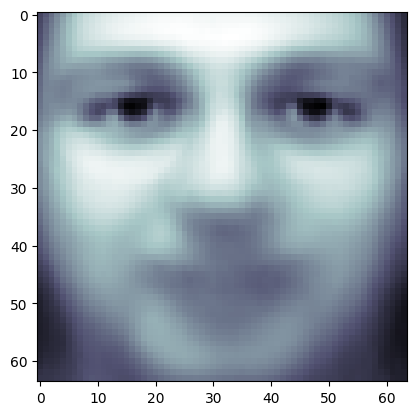

In [133]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape), cmap="bone")

The principal components measure deviations about this mean along
orthogonal axes.

In [134]:
print(pca.components_.shape)

(150, 4096)


It is also interesting to visualize these principal components:

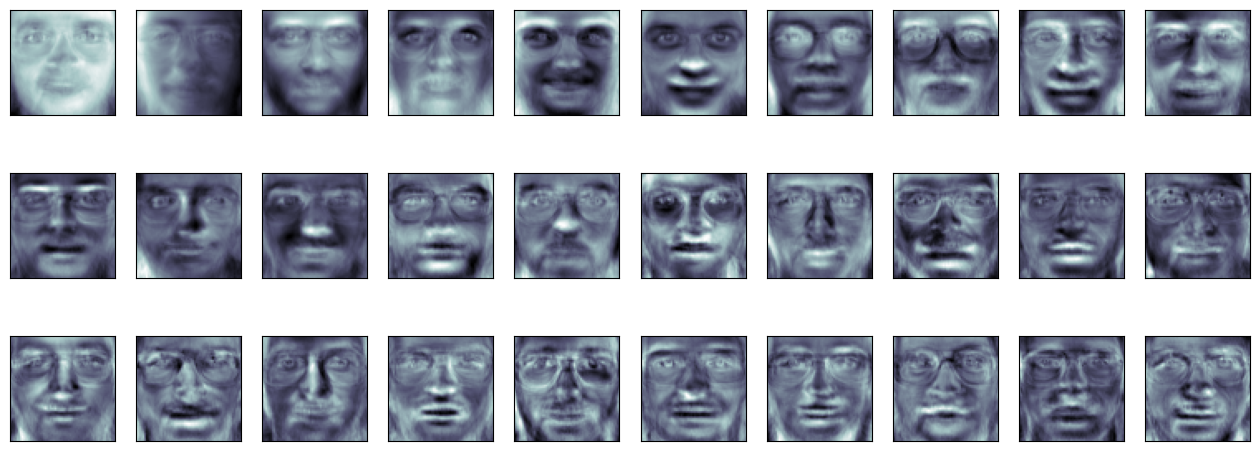

In [135]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape), cmap="bone")

The components ("eigenfaces") are ordered by their importance from
top-left to bottom-right. We see that the first few components seem to
primarily take care of lighting conditions; the remaining components
pull out certain identifying features: the nose, eyes, eyebrows, etc.

With this projection computed, we can now project our original training
and test data onto the PCA basis:

In [136]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(300, 150)
(100, 150)


These projected components correspond to factors in a linear combination
of component images such that the combination approaches the original
face.

### Doing the Learning: Support Vector Machines

Now we'll perform support-vector-machine classification on this reduced
dataset:

In [137]:
from sklearn import svm

In [138]:
clf = svm.SVC(C=5.0, gamma=0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, gamma=0.001)

Finally, we can evaluate how well this classification did. First, we
might plot a few of the test-cases with the labels learned from the
training set:

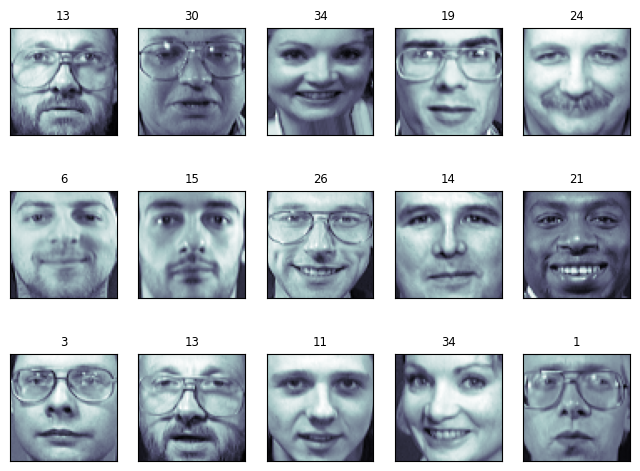

In [139]:
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape), cmap="bone")
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = "black" if y_pred == y_test[i] else "red"
    ax.set_title(y_pred, fontsize="small", color=color)

The classifier is correct on an impressive number of images given the
simplicity of its learning model! Using a linear classifier on 150
features derived from the pixel-level data, the algorithm correctly
identifies a large number of the people in the images.

Again, we can quantify this effectiveness using one of several measures
from {mod}`sklearn.metrics`. First we can do the classification
report, which shows the precision, recall and other measures of the
"goodness" of the classification:

In [140]:
from sklearn import metrics

In [141]:
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00         4
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.75      1.00      0.86         3
          17       1.00      1.00      1.00         6
          19       1.00      1.00      1.00         4
          20       1.00    

Another interesting metric is the _confusion matrix_, which indicates
how often any two items are mixed-up. The confusion matrix of a perfect
classifier would only have nonzero entries on the diagonal, with zeros
on the off-diagonal:

In [142]:
print(metrics.confusion_matrix(y_test, y_pred))

[[4 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


### Pipelining

Above we used PCA as a pre-processing step before applying our support
vector machine classifier. Plugging the output of one estimator directly
into the input of a second estimator is a commonly used pattern; for
this reason scikit-learn provides a `Pipeline` object which automates
this process. The above problem can be re-expressed as a pipeline as
follows:

In [143]:
from sklearn.pipeline import Pipeline

In [144]:
clf = Pipeline(
    [
        ("pca", decomposition.PCA(n_components=150, whiten=True)),
        ("svm", svm.LinearSVC(C=1.0)),
    ]
)

In [145]:
clf.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=150, whiten=True)),
                ('svm', LinearSVC())])

In [146]:
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))

[[3 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


### A Note on Facial Recognition

Here we have used PCA "eigenfaces" as a pre-processing step for facial
recognition. The reason we chose this is because PCA is a
broadly-applicable technique, which can be useful for a wide array of
data types. Research in the field of facial recognition in particular,
however, has shown that other more specific feature extraction methods
are can be much more effective.

(example-of-linear-and-non-linear-models)=

### Example of linear and non-linear models

<!--- plot_svm_non_linear -->

This is an example plot from the tutorial which accompanies an explanation
of the support vector machine GUI.

In [147]:
from sklearn import svm

In [148]:
rng = np.random.default_rng(27446968)

Data that is linearly separable

In [149]:
def linear_model(rseed=42, n_samples=30):
    "Generate data according to a linear model"
    np.random.seed(rseed)

    data = np.random.normal(0, 10, (n_samples, 2))
    data[: n_samples // 2] -= 15
    data[n_samples // 2 :] += 15

    labels = np.ones(n_samples)
    labels[: n_samples // 2] = -1

    return data, labels

In [150]:
X, y = linear_model()
clf = svm.SVC(kernel="linear")
clf.fit(X, y)

SVC(kernel='linear')

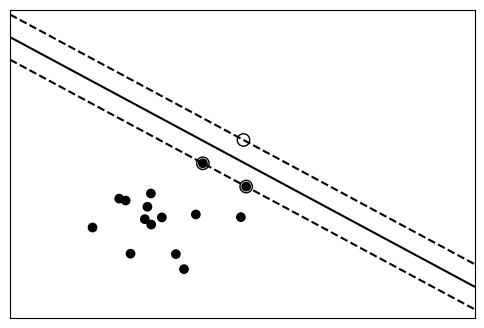

In [151]:
plt.figure(figsize=(6, 4))
ax = plt.subplot(111, xticks=[], yticks=[])
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="bone")
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=80,
    edgecolors="k",
    facecolors="none",
)
delta = 1
y_min, y_max = -50, 50
x_min, x_max = -50, 50
x = np.arange(x_min, x_max + delta, delta)
y = np.arange(y_min, y_max + delta, delta)
X1, X2 = np.meshgrid(x, y)
Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
ax.contour(
    X1, X2, Z, [-1.0, 0.0, 1.0], colors="k", linestyles=["dashed", "solid", "dashed"]
)

Data with a non-linear separation

In [152]:
def nonlinear_model(rseed=27446968, n_samples=30):
    rng = np.random.default_rng(rseed)

    radius = 40 * rng.random(n_samples)
    far_pts = radius > 20
    radius[far_pts] *= 1.2
    radius[~far_pts] *= 1.1

    theta = rng.random(n_samples) * np.pi * 2

    data = np.empty((n_samples, 2))
    data[:, 0] = radius * np.cos(theta)
    data[:, 1] = radius * np.sin(theta)

    labels = np.ones(n_samples)
    labels[far_pts] = -1

    return data, labels

In [153]:
X, y = nonlinear_model()
clf = svm.SVC(kernel="rbf", gamma=0.001, coef0=0, degree=3)
clf.fit(X, y)

SVC(coef0=0, gamma=0.001)

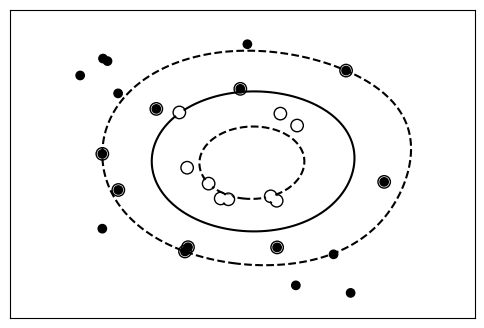

In [154]:
plt.figure(figsize=(6, 4))
ax = plt.subplot(1, 1, 1, xticks=[], yticks=[])
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="bone", zorder=2)
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=80,
    edgecolors="k",
    facecolors="none",
)
delta = 1
y_min, y_max = -50, 50
x_min, x_max = -50, 50
x = np.arange(x_min, x_max + delta, delta)
y = np.arange(y_min, y_max + delta, delta)
X1, X2 = np.meshgrid(x, y)
Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
ax.contour(
    X1,
    X2,
    Z,
    [-1.0, 0.0, 1.0],
    colors="k",
    linestyles=["dashed", "solid", "dashed"],
    zorder=1,
)

(variance-linear-regr)=

### variance_linear_regr

<!--- plot_variance_linear_regr -->

Plot variance and regularization in linear models

In [155]:
# Smaller figures

In [156]:
plt.rcParams["figure.figsize"] = (3, 2)

In [157]:
# We consider the situation where we have only 2 data point
X = np.c_[0.5, 1].T
y = [0.5, 1]
X_test = np.c_[0, 2].T

In [158]:
# Without noise, as linear regression fits the data perfectly
from sklearn import linear_model

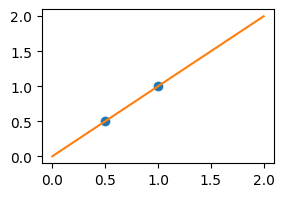

In [159]:
regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.plot(X, y, "o")
plt.plot(X_test, regr.predict(X_test))

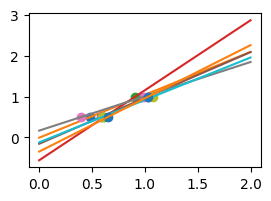

In [160]:
# In real life situation, we have noise (e.g. measurement noise) in our data:
rng = np.random.default_rng(27446968)
for _ in range(6):
    noisy_X = X + np.random.normal(loc=0, scale=0.1, size=X.shape)
    plt.plot(noisy_X, y, "o")
    regr.fit(noisy_X, y)
    plt.plot(X_test, regr.predict(X_test))

As we can see, our linear model captures and amplifies the noise in the
data. It displays a lot of variance.

We can use another linear estimator that uses regularization, the
{class}`~sklearn.linear_model.Ridge` estimator. This estimator regularizes the
coefficients by shrinking them to zero, under the assumption that very high
correlations are often spurious. The alpha parameter controls the amount of
shrinkage used.

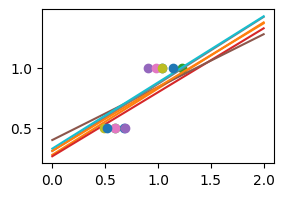

In [161]:
regr = linear_model.Ridge(alpha=0.1)
np.random.seed(0)
for _ in range(6):
    noisy_X = X + np.random.normal(loc=0, scale=0.1, size=X.shape)
    plt.plot(noisy_X, y, "o")
    regr.fit(noisy_X, y)
    plt.plot(X_test, regr.predict(X_test))